<a href="https://colab.research.google.com/github/soeun1030/pythorch_README/blob/main/04_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. 자동미분

In [1]:
import torch

## 4-1. requires_grad

In [ ]:
x = torch.ones(3, requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [ ]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


<ipython-input-17-9c3e4a13d414>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


In [ ]:
z = y ** 2
print(z)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4-2. backward()
### x -> y -> z 계산에서 역전파를 통해 기울기를 구함

In [ ]:
result = z.sum()
result.backward()

In [ ]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


## 4-3. no_grad()
### 역전파를 중지

In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = x ** 2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
  y = x ** 2
  print(x.requires_grad)
  print(y.requires_grad)

True
True
True
False


## 4-4. detach()

In [ ]:
y.detach()

tensor(1.)

# 실습1. 선형회귀 실습


Epoch [1 / 400], Loss: 259.7343
Epoch [2 / 400], Loss: 29.2077
Epoch [3 / 400], Loss: 6.3428
Epoch [4 / 400], Loss: 4.0739
Epoch [5 / 400], Loss: 3.8479
Epoch [6 / 400], Loss: 3.8244
Epoch [7 / 400], Loss: 3.8210
Epoch [8 / 400], Loss: 3.8197
Epoch [9 / 400], Loss: 3.8185
Epoch [10 / 400], Loss: 3.8174
Epoch [11 / 400], Loss: 3.8163
Epoch [12 / 400], Loss: 3.8152
Epoch [13 / 400], Loss: 3.8142
Epoch [14 / 400], Loss: 3.8131
Epoch [15 / 400], Loss: 3.8120
Epoch [16 / 400], Loss: 3.8110
Epoch [17 / 400], Loss: 3.8100
Epoch [18 / 400], Loss: 3.8089
Epoch [19 / 400], Loss: 3.8079
Epoch [20 / 400], Loss: 3.8069
Epoch [21 / 400], Loss: 3.8059
Epoch [22 / 400], Loss: 3.8049
Epoch [23 / 400], Loss: 3.8040
Epoch [24 / 400], Loss: 3.8030
Epoch [25 / 400], Loss: 3.8020
Epoch [26 / 400], Loss: 3.8011
Epoch [27 / 400], Loss: 3.8001
Epoch [28 / 400], Loss: 3.7992
Epoch [29 / 400], Loss: 3.7983
Epoch [30 / 400], Loss: 3.7974
Epoch [31 / 400], Loss: 3.7965
Epoch [32 / 400], Loss: 3.7956
Epoch [33 / 40

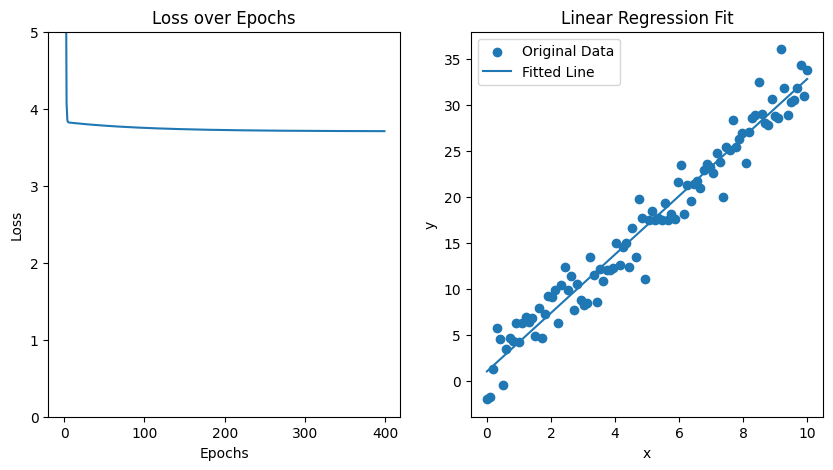

Model parameters
linear.weight : tensor([[3.1788]])
linear.bias : tensor([1.0551])


In [3]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1)  #입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2  #출력 데이터

## 2. 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)  #입력1개 출력1개
  def forward(self, x):  #foward : 순전파
    return self.linear(x)

model = LinearRegressionModel()

## 3. 손실함수 정의 -> 손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss()

## 4. 가중치 업데이트 -> 경사하강법 사용(어떤 것을 사용할지 선택)
# lr = Learning rate(러닝메이트)
optimizer = optim.SGD(model.parameters(), lr=0.01)  #SGD : 확률적 경사하강법

## 5. 학습 반복
epochs = 400
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()  #기울기 초기화
  outputs = model(x)  #예측값 계산
  loss = loss_function(outputs, y)  #손실 계산
  loss.backward()  #역전파
  optimizer.step()  #가중치 업데이트

  losses.append(loss.item())  #손실값 저장

  if (epochs % 50 == 0):
    print(f'Epoch [{epoch + 1} / {epochs}], Loss: {loss.item():.4f}')

## 6. 결과 시각화
plt.figure(figsize=(10,5))

## 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 5)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

## 학습된 모델
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
  if param.requires_grad:
    print(f"{name} : {param.data}")



실습1. 다중 선형 회귀 구현

epoch : 100 / 1000, Loss: 5.6622
epoch : 200 / 1000, Loss: 4.8829
epoch : 300 / 1000, Loss: 4.3876
epoch : 400 / 1000, Loss: 4.0684
epoch : 500 / 1000, Loss: 3.8590
epoch : 600 / 1000, Loss: 3.7181
epoch : 700 / 1000, Loss: 3.6201
epoch : 800 / 1000, Loss: 3.5491
epoch : 900 / 1000, Loss: 3.4950
epoch : 1000 / 1000, Loss: 3.4518


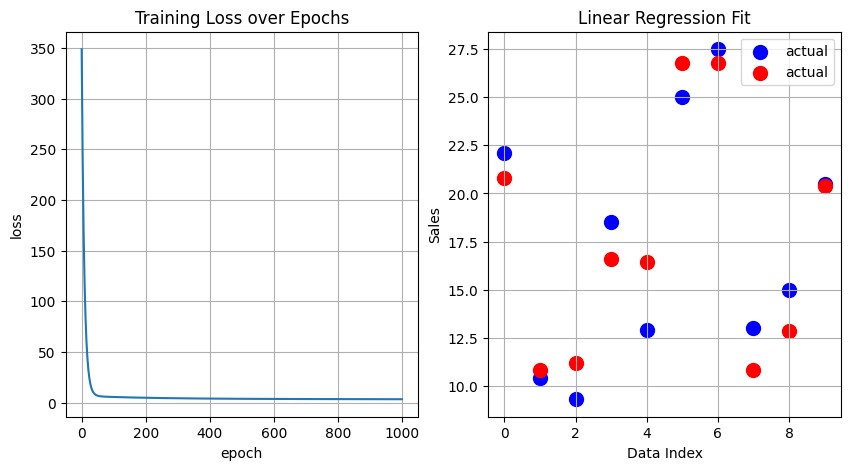

학습된 모델의 파라미터 : 
linear.weight : tensor([[0.2004, 0.1980, 0.1978]])
linear.bias : tensor([-0.0982])


In [4]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. 입출력 정의
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9],
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

## 2. 모델 정의
class MultipleLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)  #입력3개 출력1개
  def forward(self, x):  #foward : 순전파
    return self.linear(x)

model = MultipleLinearRegression()

## 3. 손실함수 정의 -> 손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss()

## 4. 가중치 업데이트 -> 경사하강법 사용(어떤 것을 사용할지 선택)
# lr = Learning rate(러닝메이트)
optimizer = optim.SGD(model.parameters(), lr=0.00001)  #SGD : 확률적 경사하강법

## 5. 학습 반복
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()  #기울기 초기화
  outputs = model(x)  #예측값 계산
  loss = loss_function(outputs, y)  #손실 계산
  loss.backward()  #역전파
  optimizer.step()  #가중치 업데이트

  losses.append(loss.item())  #손실값 저장

  if (epoch + 1) % 100 == 0:
    print(f'epoch : {epoch + 1} / {epochs}, Loss: {loss.item():.4f}')

## 6. 결과 시각화
plt.figure(figsize=(10,5))

## 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.grid(True)
plt.title("Training Loss over Epochs")
plt.xlabel("epoch")
plt.ylabel("loss")

## 학습된 모델
plt.subplot(1, 2, 2)
plt.scatter(range(len(y)), y.numpy(), label="actual", color="b", s=100)
plt.scatter(range(len(y)), model(x).detach().numpy(), label="actual", color="r", s=100)
plt.grid(True)
plt.title("Linear Regression Fit")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend()

plt.show()

## 최종 모델 파라미터 확인
print("학습된 모델의 파라미터 : ")
for name, param in model.named_parameters():
    print(f"{name} : {param.data}")

## 실습2. 로지스틱 회귀 구현

Epoch : 100 / 1000, Loss : 0.3844
Epoch : 200 / 1000, Loss : 0.3234
Epoch : 300 / 1000, Loss : 0.2899
Epoch : 400 / 1000, Loss : 0.2688
Epoch : 500 / 1000, Loss : 0.2543
Epoch : 600 / 1000, Loss : 0.2437
Epoch : 700 / 1000, Loss : 0.2357
Epoch : 800 / 1000, Loss : 0.2294
Epoch : 900 / 1000, Loss : 0.2244
Epoch : 1000 / 1000, Loss : 0.2203


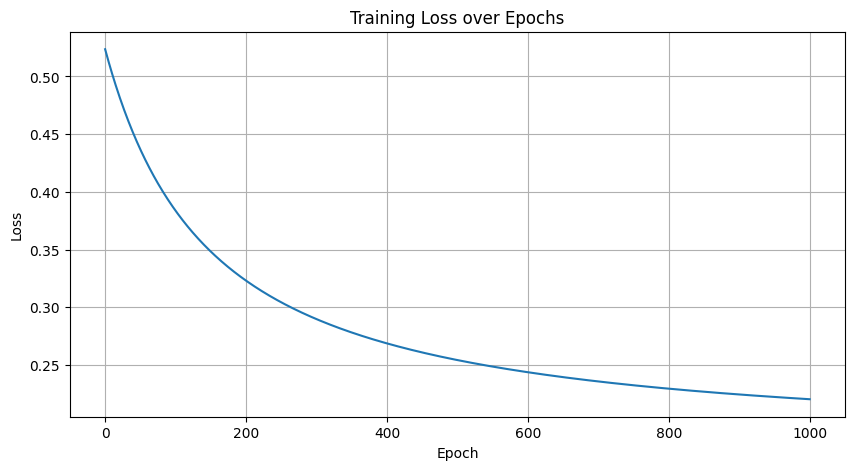

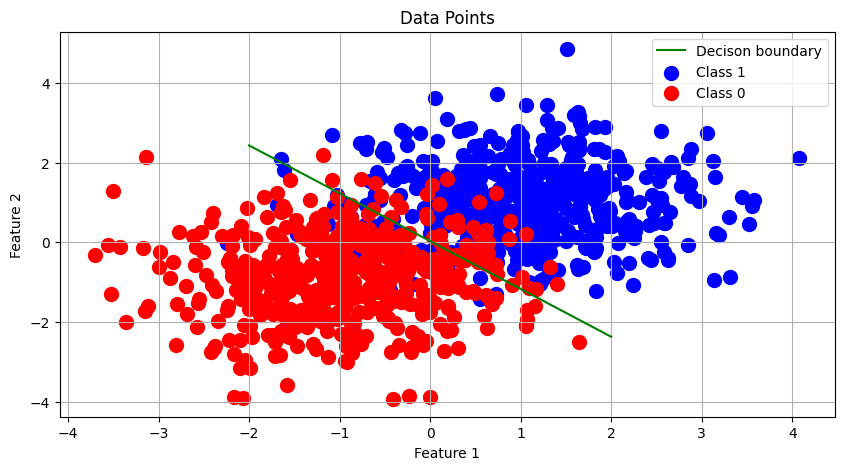

학습된 모델의 파라미터 : 
linear.weight : tensor([[1.2020, 1.2751]])
linear.bias : tensor([-0.0414])


In [5]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 1. 입출력 정의
np.random.seed(42)
num_samples = 500

## 1-1.
mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1,0],
                  [0,1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples)

## 1-2. class 0
mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1,0],
                  [0,1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples)

data = np.vstack((data_1, data_2))
data = torch.from_numpy(data).float()
labels = np.ones(num_samples * 2)
labels[num_samples:] = 0
labels = torch.from_numpy(labels).float().view(-1, 1)

# 2. 모델 정의
class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    out = torch.sigmoid(out)
    return out

model = LogisticRegression(2, 1)

# 3. 손실함수
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 1000
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(data)
  loss = loss_function(outputs, labels)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch : {epoch + 1} / {epochs}, Loss : {loss.item():.4f}')

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

plt.figure(figsize=(10, 5))

# 결정 경계 함수 정의
w = model.linear.weight.detach().numpy()
b = model.linear.bias.detach().numpy()

x1 = np.array([-2,2])
x2 = (- w[0][0] * x1) - b[0] / w[0][1]
plt.plot(x1, x2, color="g", label="Decison boundary")

plt.scatter(data_1[:, 0], data_1[:, 1], color="b", label="Class 1", s=100)
plt.scatter(data_2[:, 0], data_2[:, 1], color="r", label="Class 0", s=100)
plt.grid()
plt.legend()
plt.title("Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("학습된 모델의 파라미터 : ")
for name, param in model.named_parameters():
  print(f"{name} : {param.data}")

# 실습3. FashionMNIST 신경망 구현

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# 1.데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28 * 28, 512),  #입력층
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 256),  #Layer 1
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Linear(256, 64),  #Layer 2
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64, 10)  #출력층
    )

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device)  #GPU 적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (x,y) in enumerate(dataloader):
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    outputs = model(x)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(x)  #len(x) = 64
      print(f"loss : {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy : {100 * correct: .1f}, Avg loss : {test_loss}")

for epoch in range(epochs):
  print(f"Epoch: {epoch + 1}")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

cuda
Epoch: 1
loss :  2.3325, [0 / 60000]
loss :  0.5463, [6400 / 60000]
loss :  0.3879, [12800 / 60000]
loss :  0.5020, [19200 / 60000]
loss :  0.4651, [25600 / 60000]
loss :  0.4084, [32000 / 60000]
loss :  0.2997, [38400 / 60000]
loss :  0.4821, [44800 / 60000]
loss :  0.3870, [51200 / 60000]
loss :  0.3999, [57600 / 60000]
Accuracy :  84.6, Avg loss : 0.4127454023072674
Epoch: 2
loss :  0.3264, [0 / 60000]
loss :  0.3333, [6400 / 60000]
loss :  0.2528, [12800 / 60000]
loss :  0.3112, [19200 / 60000]
loss :  0.3162, [25600 / 60000]
loss :  0.2929, [32000 / 60000]
loss :  0.2662, [38400 / 60000]
loss :  0.3814, [44800 / 60000]
loss :  0.3149, [51200 / 60000]
loss :  0.3470, [57600 / 60000]
Accuracy :  85.8, Avg loss : 0.38152948126291775
Epoch: 3
loss :  0.2632, [0 / 60000]
loss :  0.3062, [6400 / 60000]
loss :  0.2347, [12800 / 60000]
loss :  0.2621, [19200 / 60000]
loss :  0.3055, [25600 / 60000]
loss :  0.2639, [32000 / 60000]
loss :  0.2358, [38400 / 60000]
loss :  0.3396, [44800

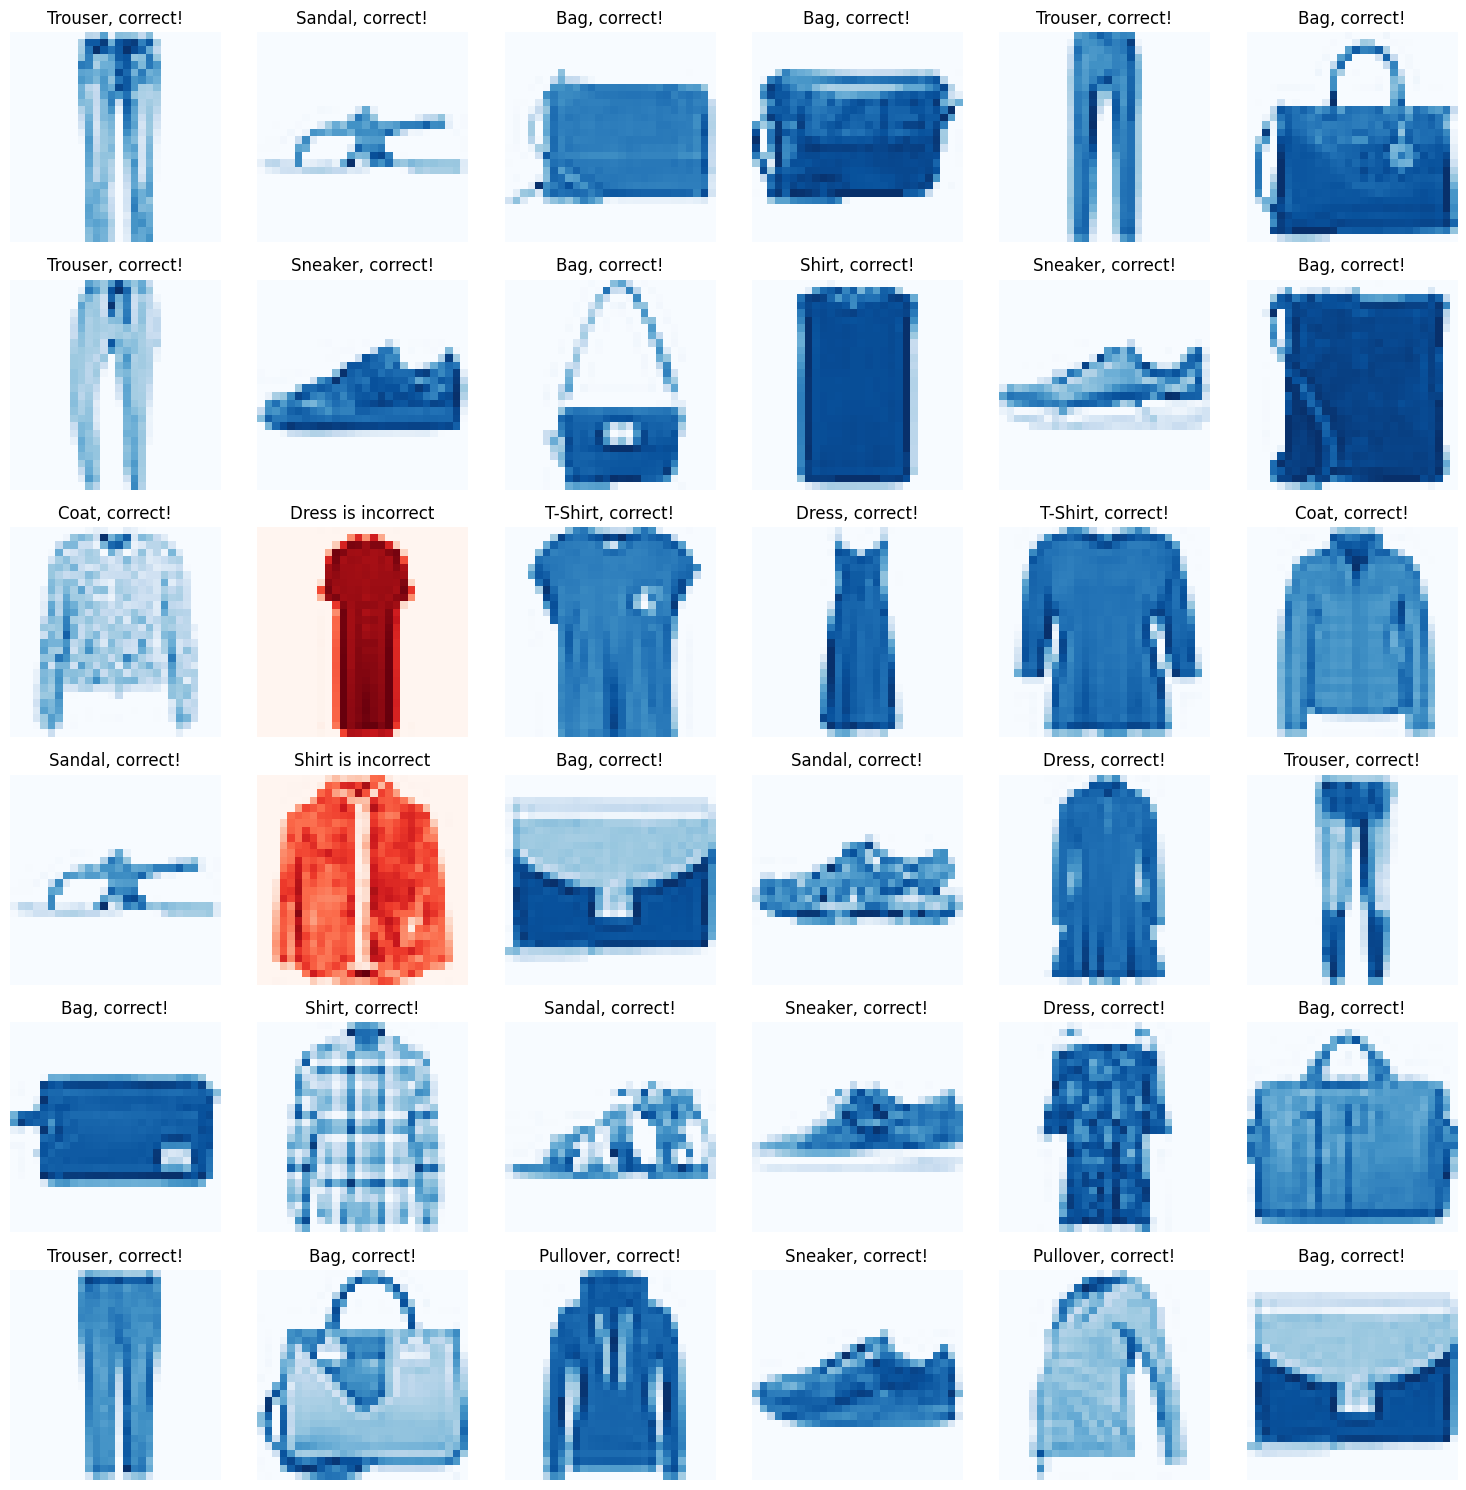

In [10]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}
columns = 6
rows = 6

fig = plt.figure(figsize=(15, 15))
model.eval()  #모델을 평가모드로 변경

for i in range(1, columns * rows + 1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
  cmap = "Blues" if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap=cmap)
  plt.title(title)
  plt.axis('off')

plt.tight_layout()
plt.show()


# 실습 4. CNN 구현
## 1. 데이터 입출력
## 2. 모델 정의
## 3. 손실함수 정의
## 4. 가중치 학습

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 1. 데이터 입출력
# 데이터 전처리 (Normalization)
transform = transforms.Compose([transforms.RandomHorizontalFlip(),  #데이터 증강 : 이미지를 좌우 반전
                                transforms.RandomCrop(32, padding=4), #32x32 -> 40x40
                                transforms.ToTensor(), #텐서로 변환
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #정규화[(RGB 평균), (RBG 표준편차)]


# CIFAR-10 데이터 로드
# 10개의 클래스로 구성된 32*32 60000개 컬러 이미지
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)


# 2. 모델 정의
class SimpleCNN(nn.Module):
  def __init__(self):
    super().__init__()  # conv 2번 / pooling 2번
    self.conv_layers = nn.Sequential(
        nn.Conv2d(3, 6, 5),  #32x32 -> 28x28x6
        nn.ReLU(),
        nn.MaxPool2d(2, 2),  #stride 28x28 -> 14x14
        nn.Conv2d(6, 16, 5),  #14x14 -> 10x10
        nn.ReLU(),
        nn.MaxPool2d(2, 2),  #10x10 -> 5x5
    )
    self.flatten = nn.Flatten()
    self.fc_layer = nn.Sequential(
        nn.Linear(5*5*16, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10),  #[1, 2, 0.2, 0.2 ....]
    )

  def forward(self, x):
    out = self.conv_layers(x)
    flatten = self.flatten(out)
    fc_out = self.fc_layer(flatten)
    return fc_out

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCNN().to(device)


# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()


# 4. 가중치 학습
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("학습 완료")

# 테스트하기
correct = 0
total = len(test_loader.dataset)
with torch.no_grad(): # test는 기울기 계산 X
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 2.301124652385712
Epoch 2, Loss: 2.2820425190925597
Epoch 3, Loss: 2.1353837893009184
Epoch 4, Loss: 1.9971312046051026
Epoch 5, Loss: 1.8939860742092132
Epoch 6, Loss: 1.8009369113445282
Epoch 7, Loss: 1.7425094890594481
Epoch 8, Loss: 1.7027170317173004
Epoch 9, Loss: 1.6702581226825715
Epoch 10, Loss: 1.6386366465091706
학습 완료
Accuracy: 39.57%


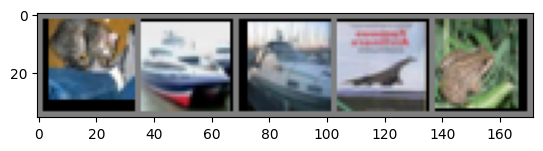

Predicted:  ship ship ship ship deer


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize, 0~1범위의 이미지를 -1~1의 범위로 사용했기 때문에 -0.5 -> *2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 이미지 차원 변경 torch (채널, 높이, 너비) -> plt (높이, 너비, 채널)
    plt.show()

def visualize_predictions(model, test_loader, num_images=5):
    dataiter = iter(test_loader)
    images, labels = next(dataiter) # 첫번째 배치의 이미지만 가져오기

    # 이미지 출력
    imshow(torchvision.utils.make_grid(images[:num_images]))

    # 모델 예측
    images = images.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

    # 레이블 정의
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 예측 결과 출력
    print("Predicted: ", " ".join(classes[predicted[j]] for j in range(num_images)))

visualize_predictions(model, test_loader, num_images=5)